In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [5]:
mtcars = pd.read_csv("D:\Study\DS\mtcars.csv")

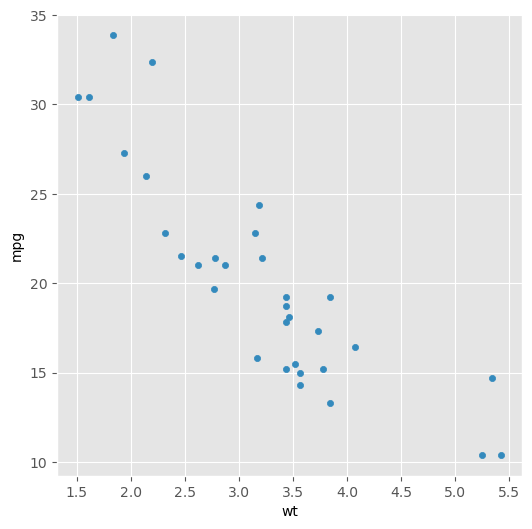

In [11]:
mtcars.plot(kind='scatter',x='wt',y='mpg',figsize=(6,6));

In [9]:
mtcars['mpg'].corr(mtcars['wt'])

-0.8676593765172281

In [16]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression()

regression_model.fit(X=pd.DataFrame(mtcars['wt']),
                    y=mtcars['mpg'])

print(regression_model.intercept_)

print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [18]:
print(regression_model.score(X=pd.DataFrame(mtcars['wt']),
     y=mtcars['mpg']))

0.7528327936582646


In [21]:
train_prediction = regression_model.predict(X=pd.DataFrame(mtcars['wt']))

residuals = mtcars['mpg'] - train_prediction

residuals.skew()

0.7011322360747061

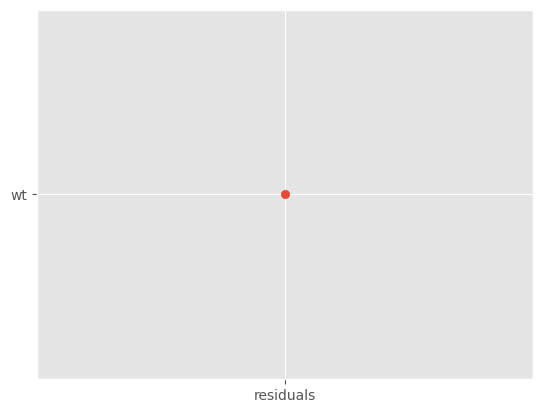

In [27]:
plt.qqplot(x='residuals',y='wt');

In [22]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars['mpg'] - mtcars['mpg'].mean())**2).sum()

r_square = 1 - (SSResiduals/SSTotal)
print(r_square)

0.7528327936582646


In [24]:
adj_residuals_r = 1-(1-r_square)*(81-1)/(81-1-1)
adj_residuals_r

0.7497040948438123

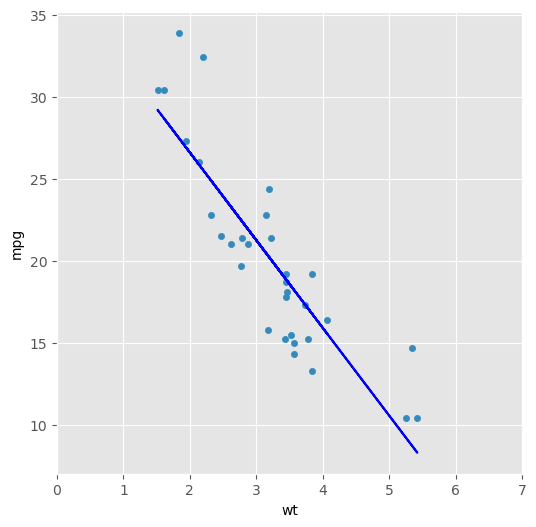

In [32]:
mtcars.plot(kind='scatter',
            x='wt',
            y='mpg',
            figsize=(6,6),
           xlim=(0,7));

plt.plot(mtcars['wt'],
        train_prediction,
        color='blue');

In [37]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


C:\Users\Shubh\AppData\Local\Temp\ipykernel_15576\4019744165.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cars = mtcars_subset.append(super_car)


ValueError: x and y must have same first dimension, but have shapes (32,) and (33,)

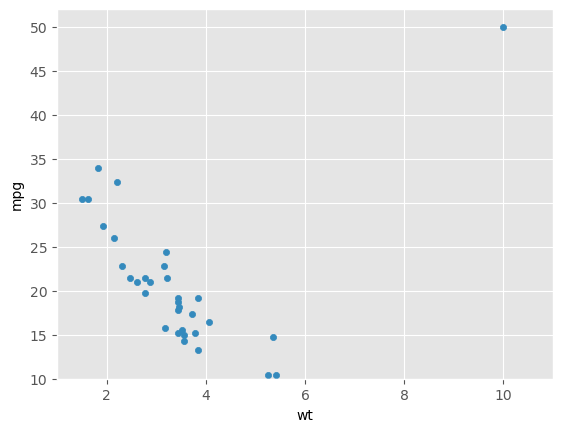

In [44]:
mtcars_subset = mtcars[['mpg','wt']]

super_car = pd.DataFrame({'mpg':50,'wt':10},index=['super'])

new_cars = mtcars_subset.append(super_car)

regression_model = linear_model.LinearRegression()

regression_model.fit(X=pd.DataFrame(mtcars['wt']),
                    y=mtcars['mpg'])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars['wt']))


new_cars.plot(kind='scatter',
             x='wt',
             y='mpg',
             xlim=(1,11),
             ylim=(10,52));

plt.plot(mtcars['wt'],
        train_prediction2,
        color='blue');

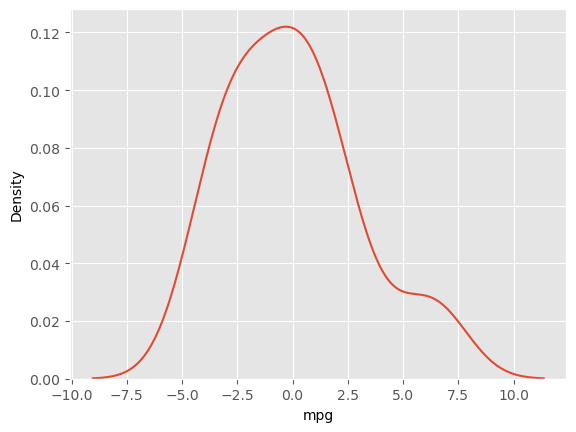

In [47]:
import seaborn as sns
sns.kdeplot(residuals)
plt.show()

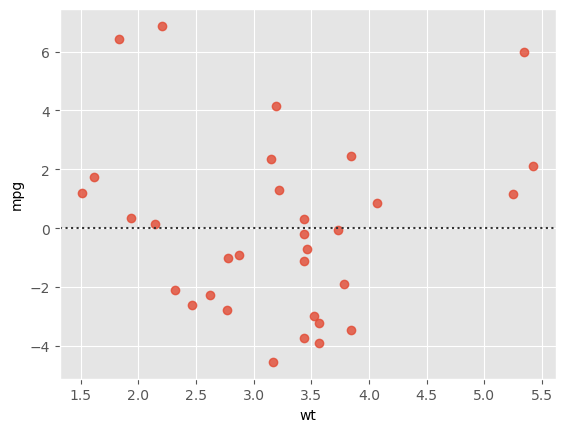

In [51]:
sns.residplot(mtcars,
             x='wt',
             y='mpg');

In [53]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction,mtcars['mpg'])**0.5

RMSE

2.949162685955028

In [54]:
sal = pd.read_csv("D:\Study\DS\Salaries.csv")

In [56]:
sal.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


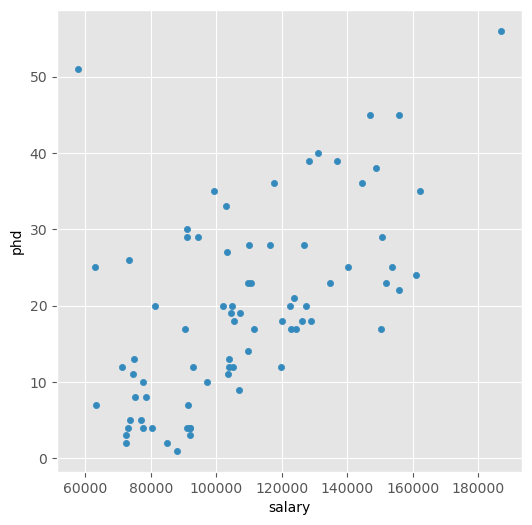

In [57]:
sal.plot(kind='scatter',x='salary',y='phd',figsize=(6,6));

In [61]:
# sal['salary'].corr(sal['phd'])
sal['salary'].corr(sal['service'])

0.5321913486037866

In [63]:
from sklearn import linear_model

regression_model_s = linear_model.LinearRegression()

regression_model_s.fit(X=pd.DataFrame(sal['salary']),
                    y=sal['phd'])

print(regression_model_s.intercept_)

print(regression_model_s.coef_)

-8.036208262878176
[0.00025681]


In [64]:
print(regression_model_s.score(X=pd.DataFrame(sal['salary']),
     y=sal['phd']))

0.33797434210712063


In [67]:
train_prediction_s = regression_model_s.predict(X=pd.DataFrame(sal['salary']))

residuals_s = sal['salary'] - train_prediction_s

residuals_s.skew()

0.45210256755588385

In [74]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars['wt'],
                          mtcars['wt']**2]).T

poly_model.fit(X=predictors,
               y=mtcars['mpg'])

print('model intercept:',regression_model_s.intercept_)

print('model Coefficient:',regression_model_s.coef_)

print('model score:',poly_model.score(X=predictors,
               y=mtcars['mpg']))

model intercept: -8.036208262878176
model Coefficient: [0.00025681]
model score: 0.8190613581384095


In [78]:
poly_line_range = np.arange(1.5,5.5,0.1)

poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

y_values = poly_model.predict(X=poly_predictors)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


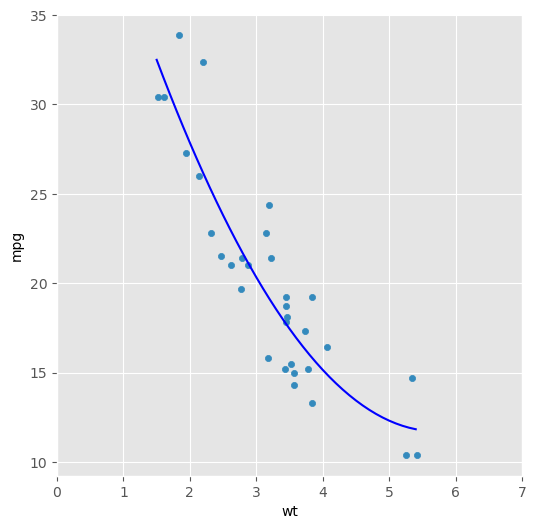

In [77]:
mtcars.plot(kind='scatter',
            x='wt',
            y='mpg',
            figsize=(6,6),
           xlim=(0,7));

plt.plot(poly_line_range,
        y_values,
        color='blue');

In [84]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars['wt'],
                           mtcars['wt']**2,
                           mtcars['wt']**3,

                           mtcars['wt']**4,

                           mtcars['wt']**5,

                           mtcars['wt']**6,

                           mtcars['wt']**7,

                           mtcars['wt']**8,

                           mtcars['wt']**9,

                           mtcars['wt']**10]).T

poly_model.fit(X=predictors,
               y=mtcars['mpg'])

print('model intercept:',regression_model_s.intercept_)

print('model Coefficient:',regression_model_s.coef_)

print('model score:',poly_model.score(X=predictors,
               y=mtcars['mpg']))

model intercept: -8.036208262878176
model Coefficient: [0.00025681]
model score: 0.8702106584850604


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


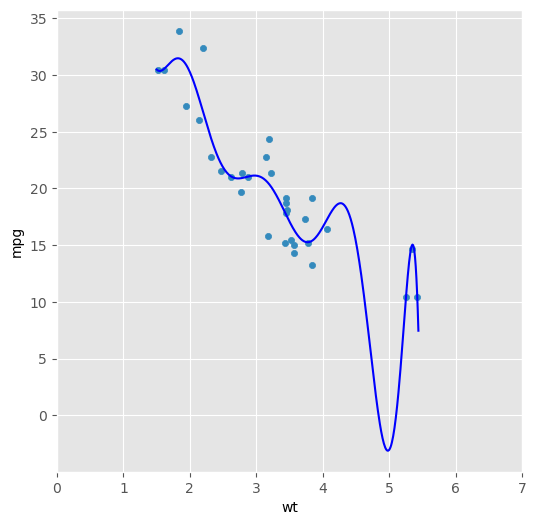

In [86]:
p_range = np.arange(1.5,5.45,0.01)

poly_predictors = pd.DataFrame([p_range,
                               p_range**2,
                               p_range**3,
                               p_range**4,
                               p_range**5,
                               p_range**6,
                               p_range**7,
                               p_range**8,
                               p_range**9,
                               p_range**10]).T

y_values = poly_model.predict(X=poly_predictors)

mtcars.plot(kind='scatter',
            x='wt',
            y='mpg',
            figsize=(6,6),
           xlim=(0,7));

plt.plot(p_range,
        y_values,
        color='blue');

In [89]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [90]:
X_features = mtcars.drop(['mpg'],axis=1)

X = sm.add_constant(X_features)
y = mtcars['mpg']

train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.8,random_state=42)

mlr_model = sm.OLS(train_y,train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.786   
Dependent Variable: mpg              AIC:                128.9768
Date:               2023-10-08 17:33 BIC:                142.3844
No. Observations:   25               Log-Likelihood:     -53.488 
Df Model:           10               F-statistic:        9.804   
Df Residuals:       14               Prob (F-statistic): 9.89e-05
R-squared:          0.875            Scale:              7.5460  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    -5.5937    30.4913   -0.1835   0.8571   -70.9911   59.8037
cyl      -0.4762     1.1831   -0.4025   0.6934    -3.0137    2.0612
disp      0.0183     0.0209    0.8779   0.3948    -0.0264    0.0630
hp       -0.0095     0.0313   -0.3038   0.7658    -0.0766    0.0576
drat      1.0021     2.2093    0.4536   0.6571    -3.7364    5.7407
wt       -4.8620     2.6004   -1.8698   0.0826   -10.4393    0.7152
qsec      1.8410     1.5070    1.2216   0.2420    -1.3913    5.0732
vs       -1.9372     3.0771   -0.6296   0.5391    -8.5368    4.6625
am        1.0766     2.4830    0.4336   0.6712    -4.2490    6.4022
gear      1.3271     1.7453    0.7604   0.4596    -2.4163    5.0705
carb      0.1471     1.1458    0.1284   0.8996    -2.3103    2.6046
-----------------------------------------------------------------
Omnibus:              2.280        Durbin-Watson:           2.374
Prob(Omnibus):        0.320        Jarque-Bera (JB):        1.965
Skew:                 0.641        Prob(JB):                0.374
Kurtosis:             2.508        Condition No.:           16579
=================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [92]:
import statsmodels.formula.api as smf
model = smf.ols('mpg~wt+vs+am+gear+carb+qsec',data=mtcars).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.826   
Dependent Variable: mpg              AIC:                155.9848
Date:               2023-10-08 17:44 BIC:                166.2449
No. Observations:   32               Log-Likelihood:     -70.992 
Df Model:           6                F-statistic:        25.46   
Df Residuals:       25               Prob (F-statistic): 1.66e-09
R-squared:          0.859            Scale:              6.3345  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     11.0050    9.8636   1.1157  0.2752  -9.3094  31.3193
wt            -3.1389    1.0100  -3.1077  0.0047  -5.2191  -1.0587
vs             0.0350    1.8261   0.0192  0.9849  -3.7259   3.7959
am             2.8836    1.8060   1.5967  0.1229  -0.8358   6.6031
gear           0.853

In [93]:
model.params

Intercept    11.004967
wt           -3.138892
vs            0.035007
am            2.883648
gear          0.853453
carb         -0.709304
qsec          0.943779
dtype: float64

In [94]:
model.tvalues

Intercept    1.115720
wt          -3.107749
vs           0.019171
am           1.596741
gear         0.655266
carb        -1.305506
qsec         1.849730
dtype: float64

In [95]:
X_features.corr()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000


In [100]:
X_features[['carb','am','qsec','wt']].corr()

,carb,am,qsec,wt
carb,1.000000,0.057534,-0.656249,0.427606
am,0.057534,1.000000,-0.229861,-0.692495
qsec,-0.656249,-0.229861,1.000000,-0.174716
wt,0.427606,-0.692495,-0.174716,1.000000


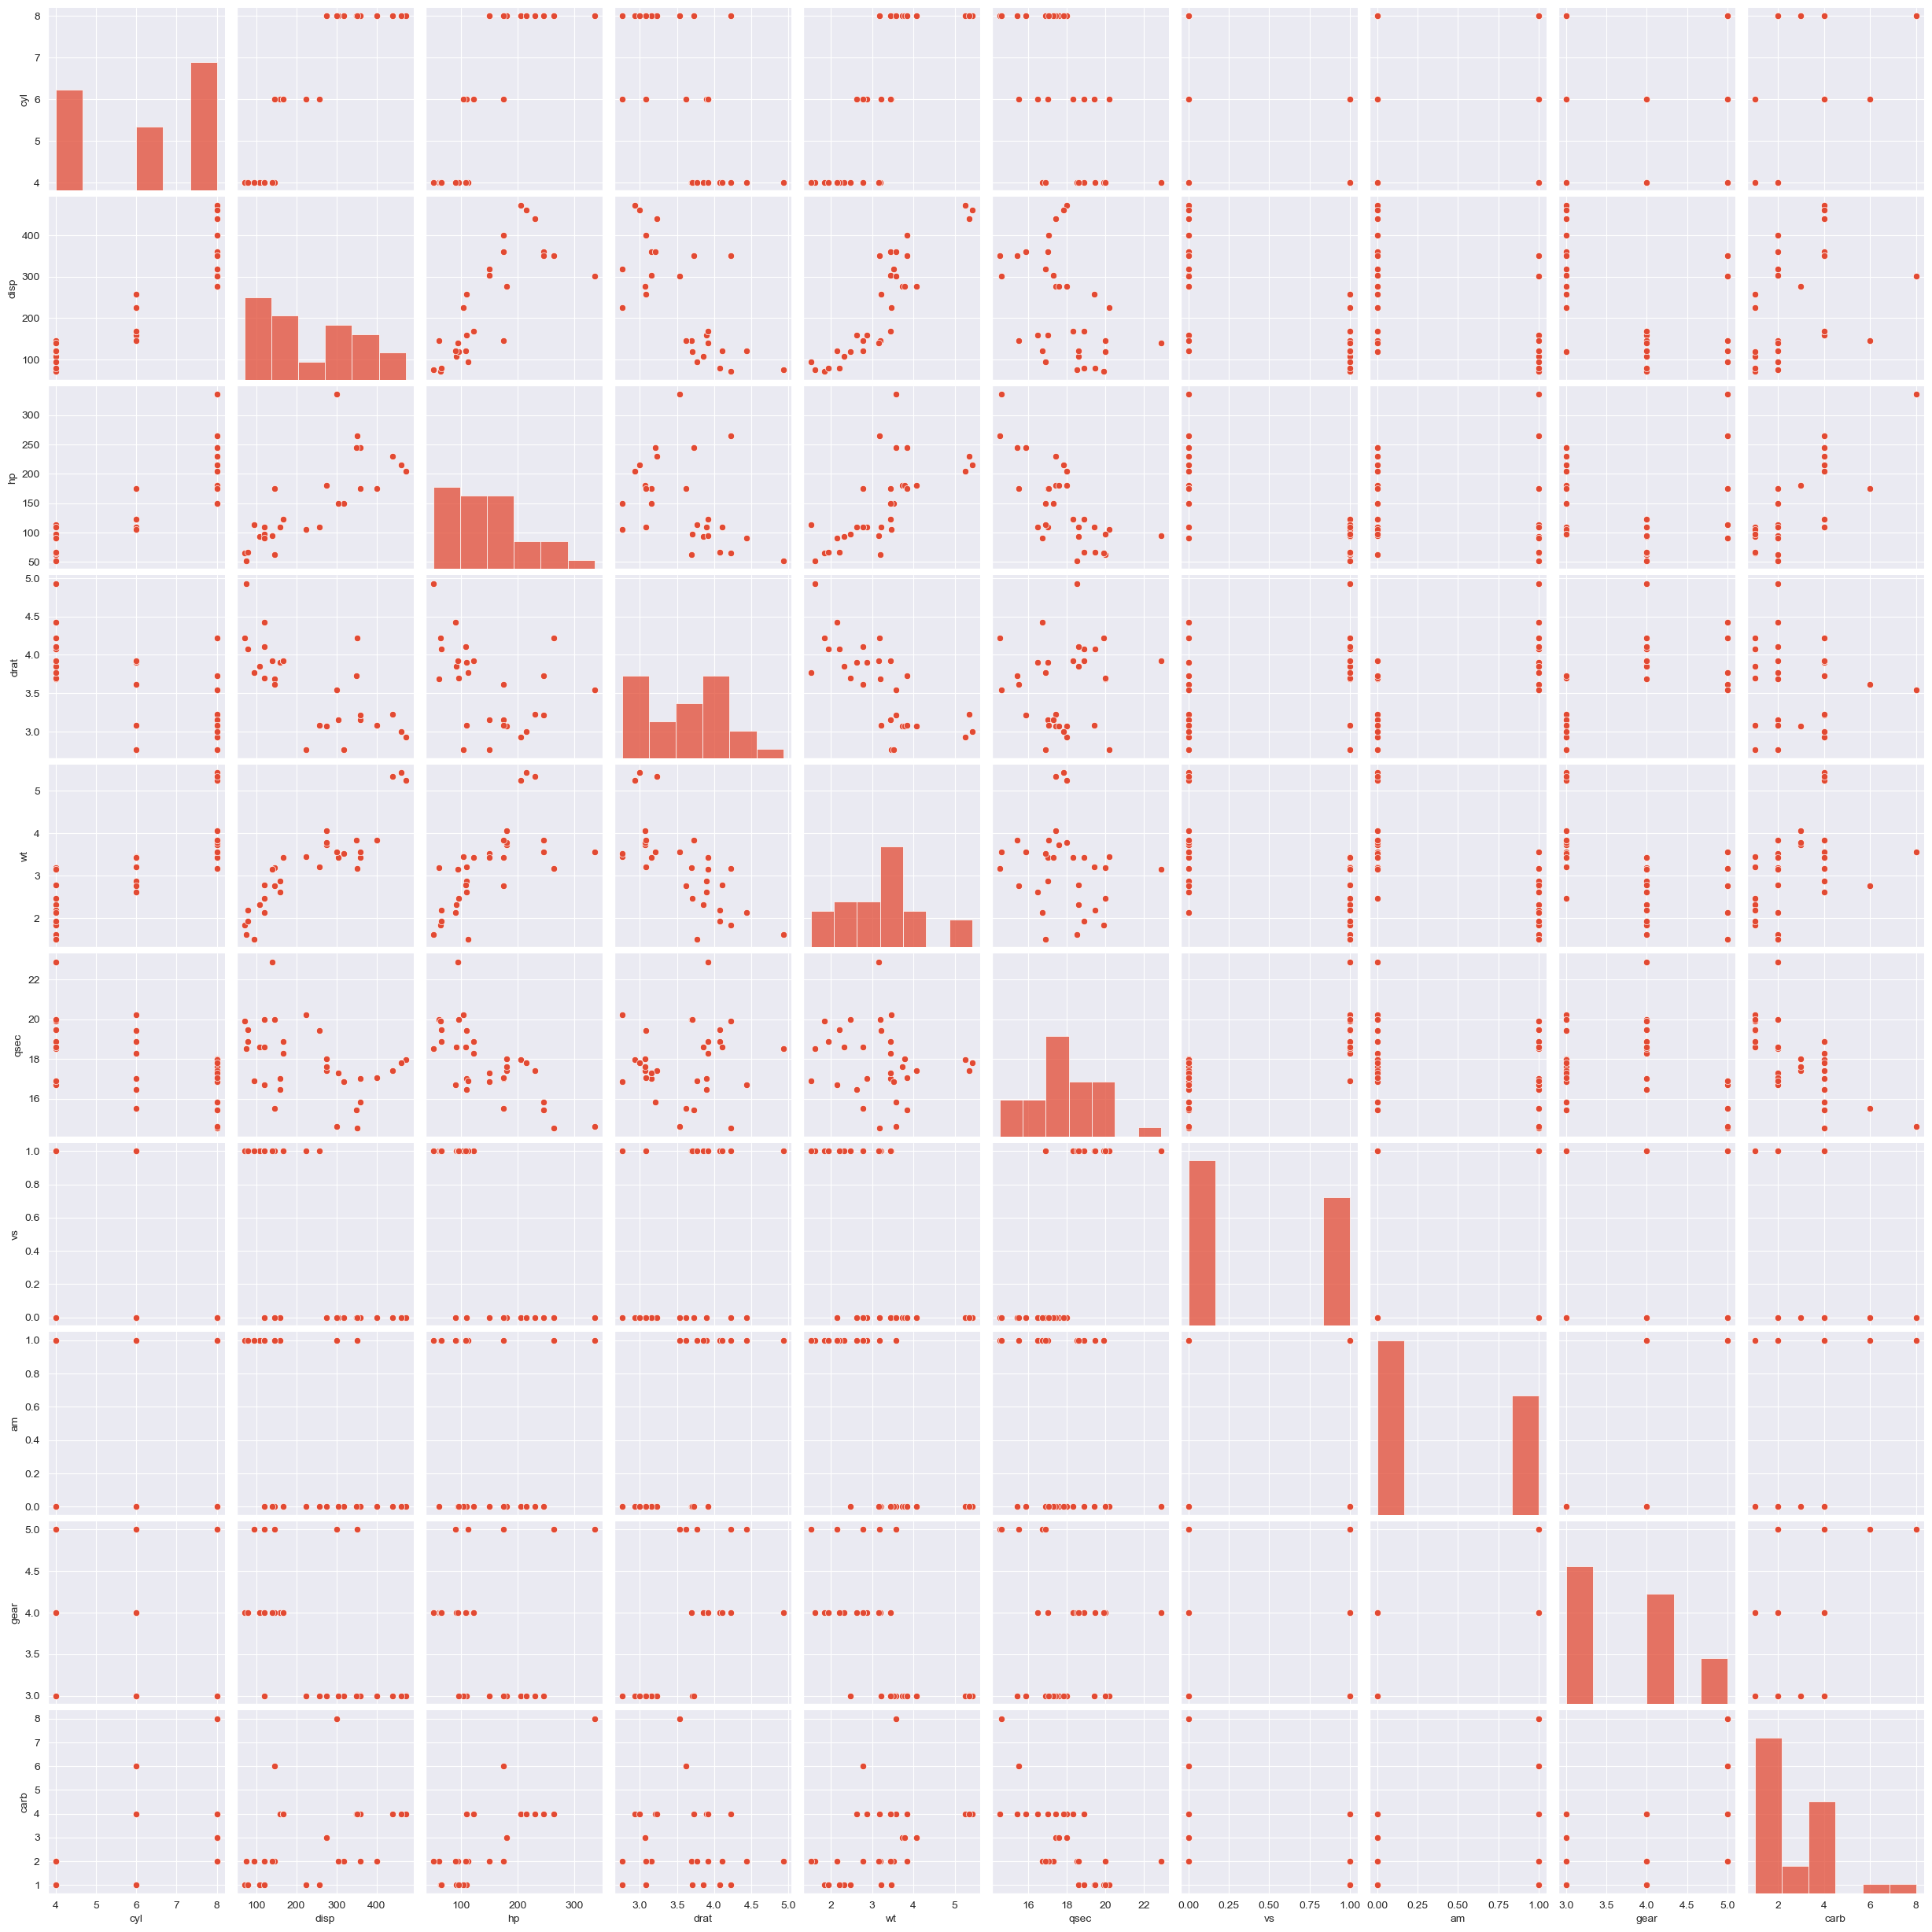

In [101]:
sns.set_style(style='darkgrid')
sns.pairplot(X_features)